In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [8]:
class RSIModel:
    def __init__(self, period=14):
        self.period = period
    
    def calculate_rsi(self, prices):
        """Calculate RSI for a series of prices"""
        # Calculate price changes
        delta = prices.diff()
        
        # Separate gains and losses
        gain = (delta.where(delta > 0, 0)).rolling(window=self.period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=self.period).mean()
        
        # Calculate RS and RSI
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        
        return rsi
    
    def get_stock_data(self, symbol, period="1y"):
        """Fetch stock data"""
        stock = yf.Ticker(symbol)
        data = stock.history(period=period)
        return data
    
    def analyze_stock(self, symbol):
        """Complete RSI analysis for a stock"""
        # Get stock data
        data = self.get_stock_data(symbol)
        
        # Calculate RSI
        data['RSI'] = self.calculate_rsi(data['Close'])
        
        # Generate signals
        data['Signal'] = self.generate_signals(data['RSI'])
        
        return data
    
    def generate_signals(self, rsi):
        """Generate buy/sell signals based on RSI"""
        signals = pd.Series(index=rsi.index, dtype='object')
        
        # Buy signals (RSI crosses above 30)
        signals.loc[(rsi.shift(1) < 30) & (rsi >= 30)] = 'BUY'
        
        # Sell signals (RSI crosses below 70)
        signals.loc[(rsi.shift(1) > 70) & (rsi <= 70)] = 'SELL'
        
        return signals
    
    def plot_analysis(self, symbol):
        """Plot price and RSI analysis"""
        data = self.analyze_stock(symbol)
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
        
        # Plot price
        ax1.plot(data.index, data['Close'], label='Close Price', linewidth=2)
        
        # Plot buy/sell signals
        buy_signals = data[data['Signal'] == 'BUY']
        sell_signals = data[data['Signal'] == 'SELL']
        
        ax1.scatter(buy_signals.index, buy_signals['Close'], 
                   color='green', marker='^', s=100, label='Buy Signal')
        ax1.scatter(sell_signals.index, sell_signals['Close'], 
                   color='red', marker='v', s=100, label='Sell Signal')
        
        ax1.set_title(f'{symbol} Price with RSI Signals')
        ax1.set_ylabel('Price ($)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot RSI
        ax2.plot(data.index, data['RSI'], color='purple', linewidth=2)
        ax2.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Overbought (70)')
        ax2.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Oversold (30)')
        ax2.axhline(y=50, color='gray', linestyle='-', alpha=0.5, label='Neutral (50)')
        
        ax2.set_title('RSI Oscillator')
        ax2.set_ylabel('RSI')
        ax2.set_xlabel('Date')
        ax2.set_ylim(0, 100)
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return data

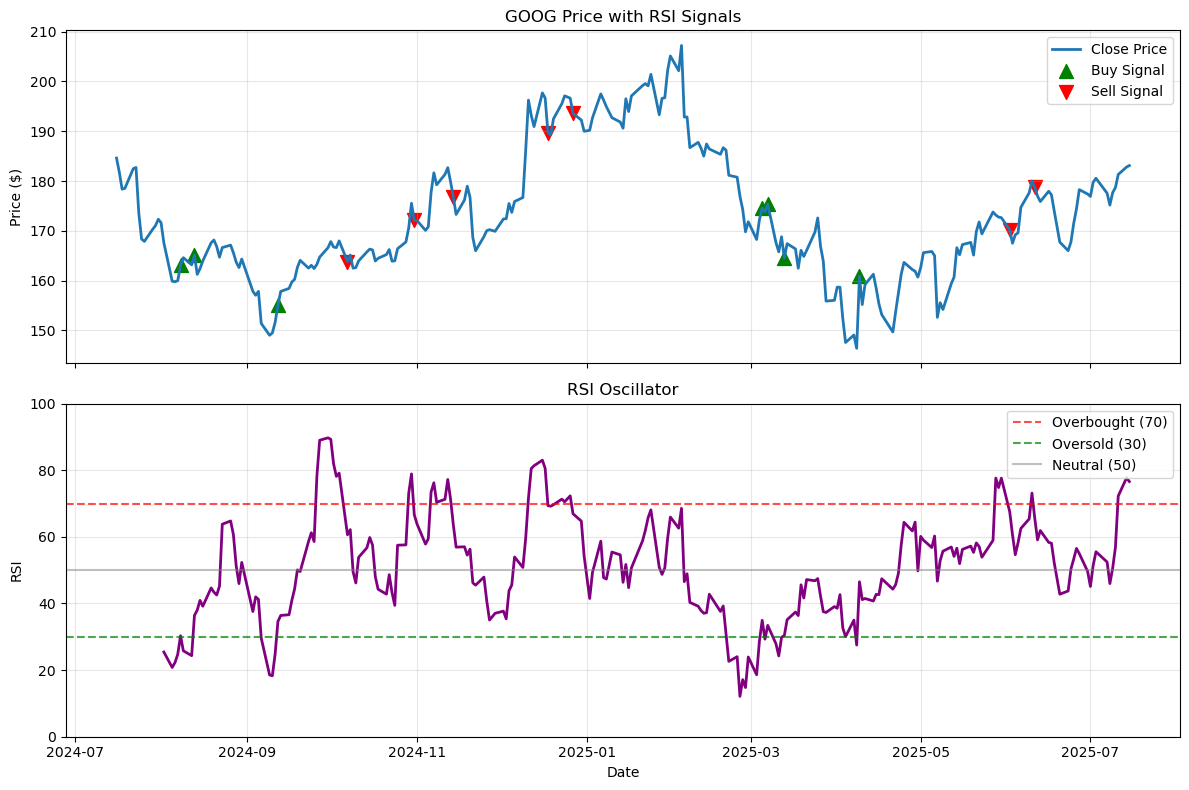

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI,Signal
Date,,,,,,,,,
2024-07-16 00:00:00-04:00,188.057184,189.430580,184.235519,184.613708,12760100,0.0,0.0,NaN,NaN
2024-07-17 00:00:00-04:00,183.797638,184.345013,180.752260,181.747482,17376600,0.0,0.0,NaN,NaN
2024-07-18 00:00:00-04:00,182.663076,183.170649,177.358555,178.363724,17877200,0.0,0.0,NaN,NaN
2024-07-19 00:00:00-04:00,179.508227,181.100588,178.005447,178.532913,14485900,0.0,0.0,NaN,NaN
2024-07-22 00:00:00-04:00,181.478762,183.419442,181.030900,182.473984,16303900,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-07-09 00:00:00-04:00,176.110001,180.279999,173.880005,177.660004,31288000,0.0,0.0,50.591157,NaN
2025-07-10 00:00:00-04:00,176.669998,179.589996,175.740005,178.699997,24693700,0.0,0.0,56.908666,NaN
2025-07-11 00:00:00-04:00,177.910004,182.610001,177.541000,181.309998,23975700,0.0,0.0,72.247706,NaN


In [9]:
rsi = RSIModel()
rsi.plot_analysis('GOOG')
